In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("data/071421 FlowPots 1st Repeat.csv")
data2 = pd.read_csv("data/071921 FlowPots 2nd Repeat.csv")

In [3]:
data1 = data1.iloc[:,:-2]

In [4]:
data = data1.append(data2)

In [5]:
data = data.transpose()

In [6]:
data = data.unstack().reset_index()

In [7]:
data = data.drop(columns = 'level_0')

In [8]:
data = data.dropna()

In [9]:
#data = data.reset_index()

In [10]:
data[['genotype', 'split']] = data['level_1'].str.split('_', 1, expand=True)
data[['condition', 'repeat']] = data['split'].str.split('-', 1, expand=True)
data = data.drop(columns='split')

In [11]:
data = data.drop(columns='level_1')

In [12]:
data.groupby("condition")[0].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
1,40.0,26.355000,12.658613,4.3,16.175,27.20,32.775,64.3
2,38.0,28.326316,13.345283,7.2,20.975,26.00,34.700,57.2
3,40.0,27.587500,10.813908,3.5,20.950,28.15,34.275,50.7


In [13]:
data = data.rename(columns={0: "weight(mg)", "condition": "iron_condition"})

In [14]:
import seaborn as sns
from statannot import add_stat_annotation
sns.set_theme(style="whitegrid")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-4.686e-02
2 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.330e-01
1 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.909e-01


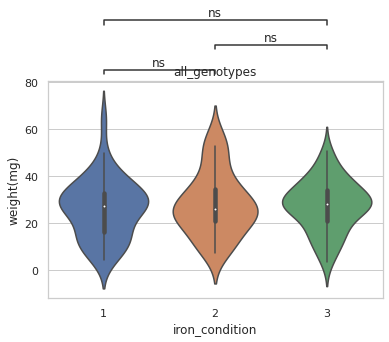

In [217]:
plt.figure()
ax = sns.violinplot(x="iron_condition", y="weight(mg)", data=data,
                   scale='count')
ax.set_title('all_genotypes')
order = ['1','2','3']
x = 'iron_condition'
y = 'weight(mg)'
add_stat_annotation(ax, data=data[data['genotype'] == i], x=x, y=y, order=order,
                box_pairs=[('1','2'), ('1','3'), ('2','3')],
                test='t-test_ind', text_format='star', loc='outside', verbose=2)
plt.savefig("flow_pot_perlite_iron_condition_weights_all_sig" + '.png')
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Col0 v.s. Italy18-1: t-test independent samples with Bonferroni correction, P_val=5.129e-01 stat=-1.610e+00
Italy18-1 v.s. CGN1-10: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-8.081e-01
Col0 v.s. Italy1-1: t-test independent samples with Bonferroni correction, P_val=3.853e-02 stat=-2.896e+00
Col0 v.s. CGN1-10: t-test independent samples with Bonferroni correction, P_val=4.084e-02 stat=-2.888e+00


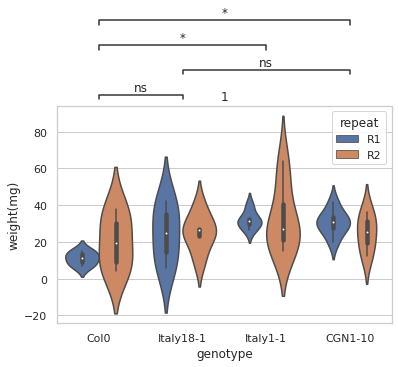

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Col0 v.s. Italy18-1: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-6.812e-01
Italy18-1 v.s. CGN1-10: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=5.040e-01
Col0 v.s. Italy1-1: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=5.608e-02
Col0 v.s. CGN1-10: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-5.248e-01


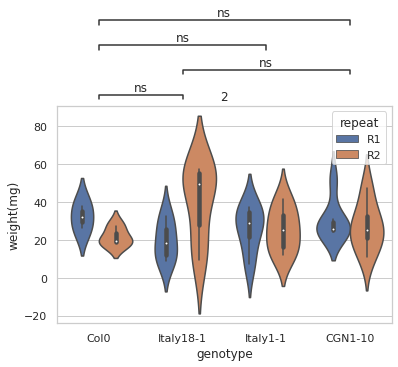

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Col0 v.s. Italy18-1: t-test independent samples with Bonferroni correction, P_val=4.436e-01 stat=-1.682e+00
Italy18-1 v.s. CGN1-10: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=6.576e-01
Col0 v.s. Italy1-1: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=3.287e-01
Col0 v.s. CGN1-10: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-7.880e-01


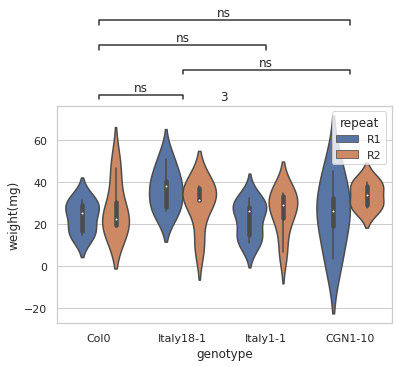

In [15]:
for i in data['iron_condition'].unique():
    plt.figure()
    ax = sns.violinplot(x="genotype", y="weight(mg)", hue='repeat', data=data[data['iron_condition'] == i],
                       scale='count')
    ax.set_title(i)
    order = ['Col0','Italy18-1','Italy1-1', 'CGN1-10']
    x = 'genotype'
    y = 'weight(mg)'
    add_stat_annotation(ax, data=data[data['iron_condition'] == i], x=x, y=y, order=order,
                    box_pairs=[('Col0','Italy18-1'), ('Col0','CGN1-10'), ('Italy18-1','CGN1-10'),
                              ('Col0', 'Italy1-1')],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)
    plt.savefig("flow_pot_perlite_iron_condition_weights_per_genotype" + str(i) + '.png')
    plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: t-test independent samples with Bonferroni correction, P_val=3.280e-01 stat=-1.742e+00
2 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.294e-01
1 v.s. 3: t-test independent samples with Bonferroni correction, P_val=2.480e-01 stat=-1.860e+00


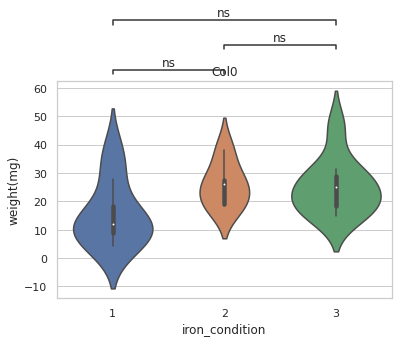

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-9.550e-01
2 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.433e-01
1 v.s. 3: t-test independent samples with Bonferroni correction, P_val=4.060e-01 stat=-1.568e+00


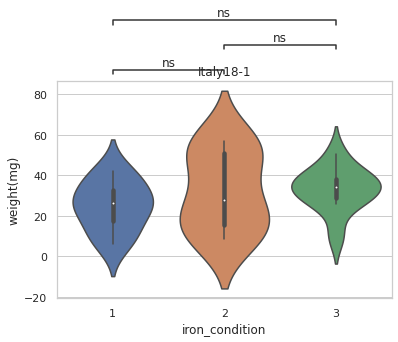

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: t-test independent samples with Bonferroni correction, P_val=5.771e-01 stat=1.347e+00
2 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=4.074e-01
1 v.s. 3: t-test independent samples with Bonferroni correction, P_val=2.167e-01 stat=1.884e+00


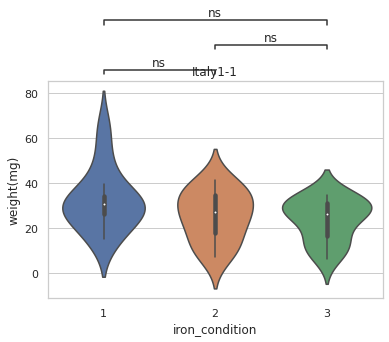

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-4.686e-02
2 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.330e-01
1 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.909e-01


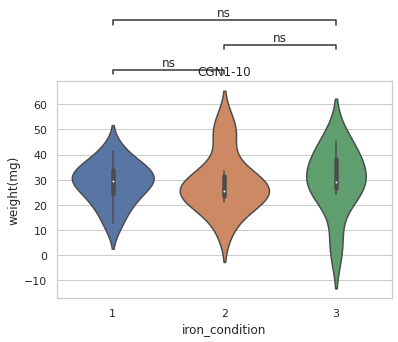

In [220]:
for i in data['genotype'].unique():
    plt.figure()
    ax = sns.violinplot(x="iron_condition", y="weight(mg)", data=data[data['genotype'] == i],
                       scale='count')
    ax.set_title(i)
    order = ['1','2','3']
    x = 'iron_condition'
    y = 'weight(mg)'
    add_stat_annotation(ax, data=data[data['genotype'] == i], x=x, y=y, order=order,
                    box_pairs=[('1','2'), ('1','3'), ('2','3')],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)
    plt.savefig("flow_pot_perlite_iron_condition_weights_sig" + str(i) + '.png')
    plt.show()

